In [1]:
import matplotlib
import matplotlib.pyplot as plt

import networkx as nx
from pyetherscan.api import Connector
import yaml

In [3]:
config = yaml.load(open('../user_config.yaml', 'r'), yaml.Loader)

etherscan = Connector(config['etherscan_key'])

In [15]:
def get_block_graph(block_number, node_set):
    edge_list = []
    block_details = etherscan.proxy.eth_getBlockByNumber(block_number)['result']
    for transaction in block_details['transactions']:
        if transaction['to'] is not None and transaction['from'] is not None:
            receiver = transaction['to']
            sender = transaction['from']
            node_set.add(receiver)
            node_set.add(sender)
            edge_list.append((receiver, sender))
    return edge_list, node_set

In [16]:
start_block_hex = etherscan.proxy.eth_blockNumber()['result']
start_block = int(start_block_hex, 16) - 1

In [17]:
blocks_in_basic_graph = 10

In [18]:
edge_list = []
node_set = set()
for i in range(blocks_in_basic_graph):
    block_list, node_set = get_block_graph(hex(start_block - i), node_set)
    edge_list += block_list

In [19]:
G = nx.Graph()
G.add_edges_from(edge_list)

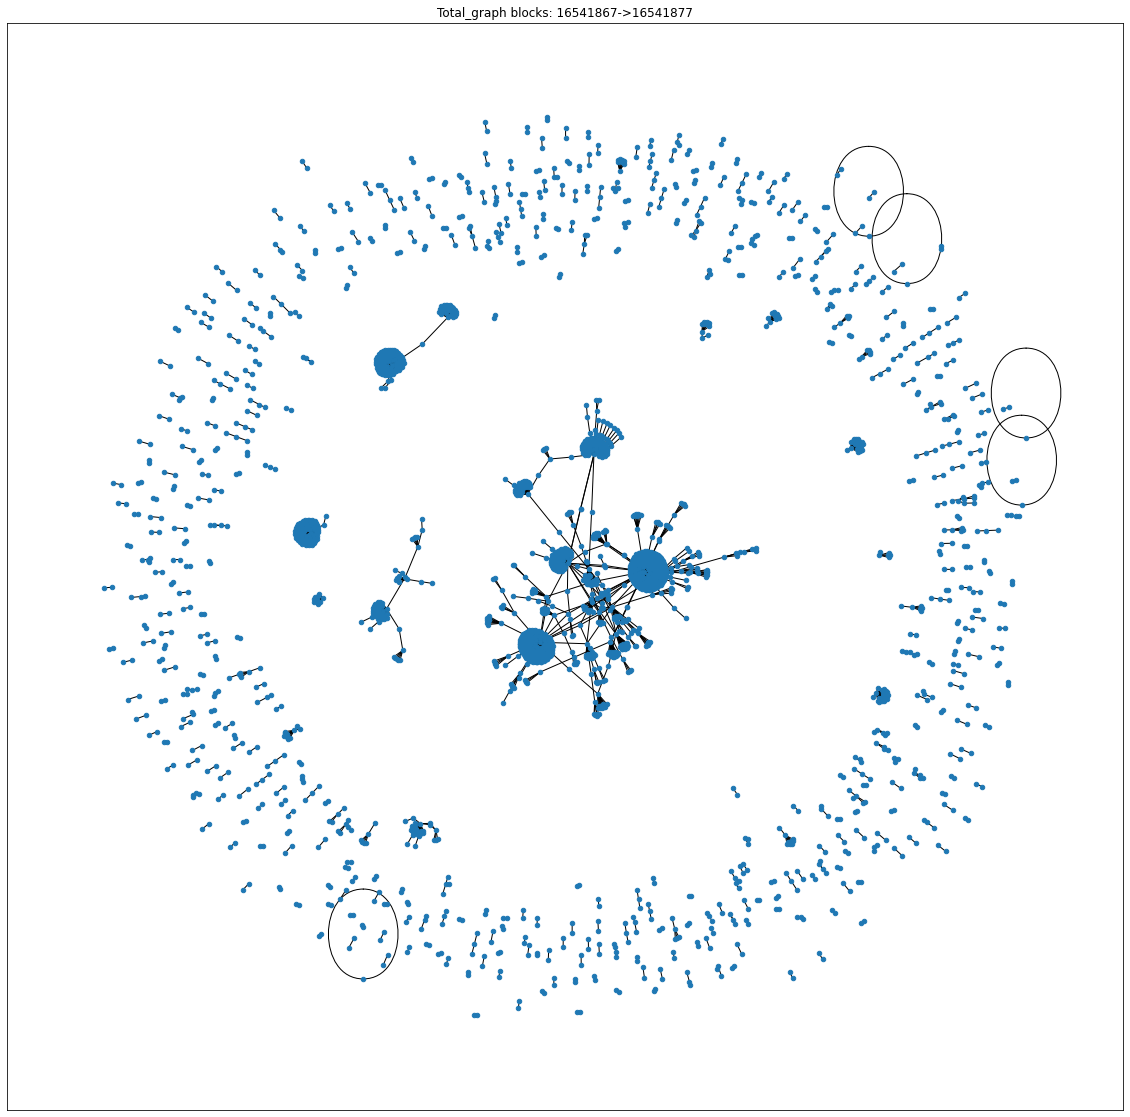

In [20]:
fig = plt.figure(figsize=(20,20))

plt.title(f"Total_graph blocks: {start_block - blocks_in_basic_graph}->{start_block}")
pos = nx.spring_layout(G, scale=10)
nx.draw_networkx(G, pos=pos, node_size=20, with_labels=False)
fig.savefig(f'../assets/graph_{start_block - blocks_in_basic_graph}:{start_block}.png')